# Strain mapping

This notebook provides an easy to use interface to the software package for the single Bragg edge fitting, for the analysis  of strain and texture variations.

Full step by step tutorial can be found [here](here)

# Importing python modules and functions

In [ ]:
import numpy as np
from jupyter_notebooks.code.strain_mapping_api_for_notebook import StrainMappingAPIForNotebook
from jupyter_notebooks.code.roi_selection import Interface as RoiInterface
from jupyter_notebooks.code.fit_interface import Interface as FitInterface

In [2]:
%gui qt

# General Settings 

In [3]:
o_api = StrainMappingAPIForNotebook()
o_api.general_settings()

# Loading sample, time spectra and open beam.

## Select sample folder

Select the folder(s) containing the sample data. 

If you are **working with raw data**, this/these folder(s) must contain:
 * all the projections
 * time spectra file  (\*_Spectra.txt)
 * shutter count (\*_ShutterCount.txt) **if working with RAW data**
 * shutter times (\*_ShutteTimes.txt)
 
If you are **not working with raw data**, the notebook will automatically load the **time spectra** file, if located in the same folder, otherwise it will ask you to select it.

**NB**:
- If more than 1 folder is selected, the folder will be combined using mean values.

In [4]:
o_api.select_sample()

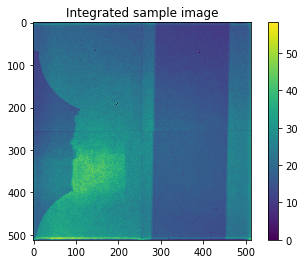

In [5]:
o_api.preview_sample()

## Select open beam folder (if needed)

In [5]:
o_api.select_ob()

# Select region to fit 

In [6]:
o_gui = RoiInterface(main_api=o_api)
o_gui.show()

# Prepare data

In [7]:
o_api.prepare_data(list_roi=o_gui.list_roi)

Normalization (pixel by pixel) ... in progress
np.shape(sample): (1479, 512, 512)
np.shape(ob): (1479, 512, 512)


AttributeError: 'list' object has no attribute 'transpose'

# Data fitting
Data is now ready for fitting. We fit both using Gaussian method and Advanced method. In both case we test first on a single pixel by setting the debug_idx parameter, and we use the fit results as initial guess for the full image fitting to increase performance (both speed and quality).

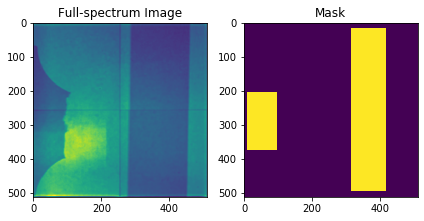

/Users/j35/git/ToFImaging/ToFImaging/edgefitting_2D.py:221: RuntimeWarning: divide by zero encountered in log
  Ttof = -np.log(Ttof)


Edge position =  3.5157906206486556
Edge height =  7.403717233218859e-08
Edge width =  75.04207795075123
idx_low =  0 idx_high =  100


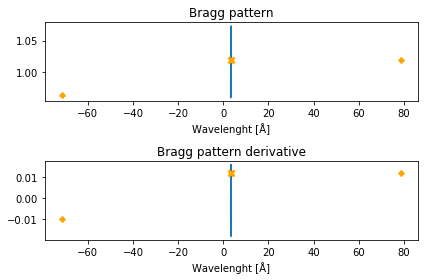

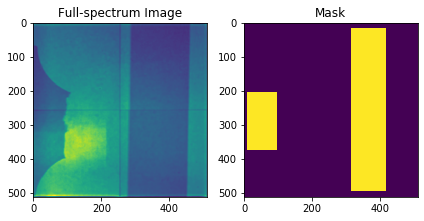

  0%|          | 0/512 [00:00<?, ?it/s]//miniconda3/envs/py36/lib/python3.6/site-packages/lmfit/minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
//miniconda3/envs/py36/lib/python3.6/site-packages/lmfit/minimizer.py:786: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
 13%|█▎        | 69/512 [02:41<20:14,  2.74s/it]//miniconda3/envs/py36/lib/python3.6/site-packages/lmfit/minimizer.py:786: RuntimeWarning: divide by zero encountered in double_scalars
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
100%|██████████| 512/512 [31:00<00:00,  3.63s/it]


--- 1860.5681881904602 seconds ---


In [9]:
o_fit = FitInterface(o_roi=o_gui,
                     o_api=o_api)
o_fit.show()